<a href="https://colab.research.google.com/github/sjoerdteunisse/ML2-Workshop-project/blob/main/Countries_of_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Countries of the world ML project

## Import dependecies

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import keras

## Load data

In [170]:
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/Countries-Of-The-World-data/countries%20of%20the%20world.csv

--2020-09-21 13:50:42--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/Countries-Of-The-World-data/countries%20of%20the%20world.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38303 (37K) [text/plain]
Saving to: ‘countries of the world.csv.5’

countries of the wo 100%[===================>]  37.41K  --.-KB/s    in 0.008s  

2020-09-21 13:50:42 (4.68 MB/s) - ‘countries of the world.csv.5’ saved [38303/38303]



In [171]:
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2015.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2016.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2017.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2018.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2019.csv

--2020-09-21 13:50:42--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16557 (16K) [text/plain]
Saving to: ‘WH-2015.csv.5’

WH-2015.csv.5       100%[===================>]  16.17K  --.-KB/s    in 0.006s  

2020-09-21 13:50:42 (2.52 MB/s) - ‘WH-2015.csv.5’ saved [16557/16557]

--2020-09-21 13:50:42--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respon

In [172]:
raw_cofw_df = pd.read_csv("/content/countries of the world.csv", decimal=',')

In [173]:
raw_cofw_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [174]:
raw_cofw_df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [175]:
raw_cofw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [176]:
raw_data = raw_cofw_df.iloc[:,:]

In [177]:
raw_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Print all numerical data


In [178]:
numerical_var = raw_data.select_dtypes(include=[np.number])
numerical_var.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

## Print all categorical data


In [179]:
categorical_var = raw_data.select_dtypes(exclude=[np.number])
categorical_var.dtypes

Country    object
Region     object
dtype: object

## Check unusable data values

In [180]:
print(pd.isnull(raw_data).sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


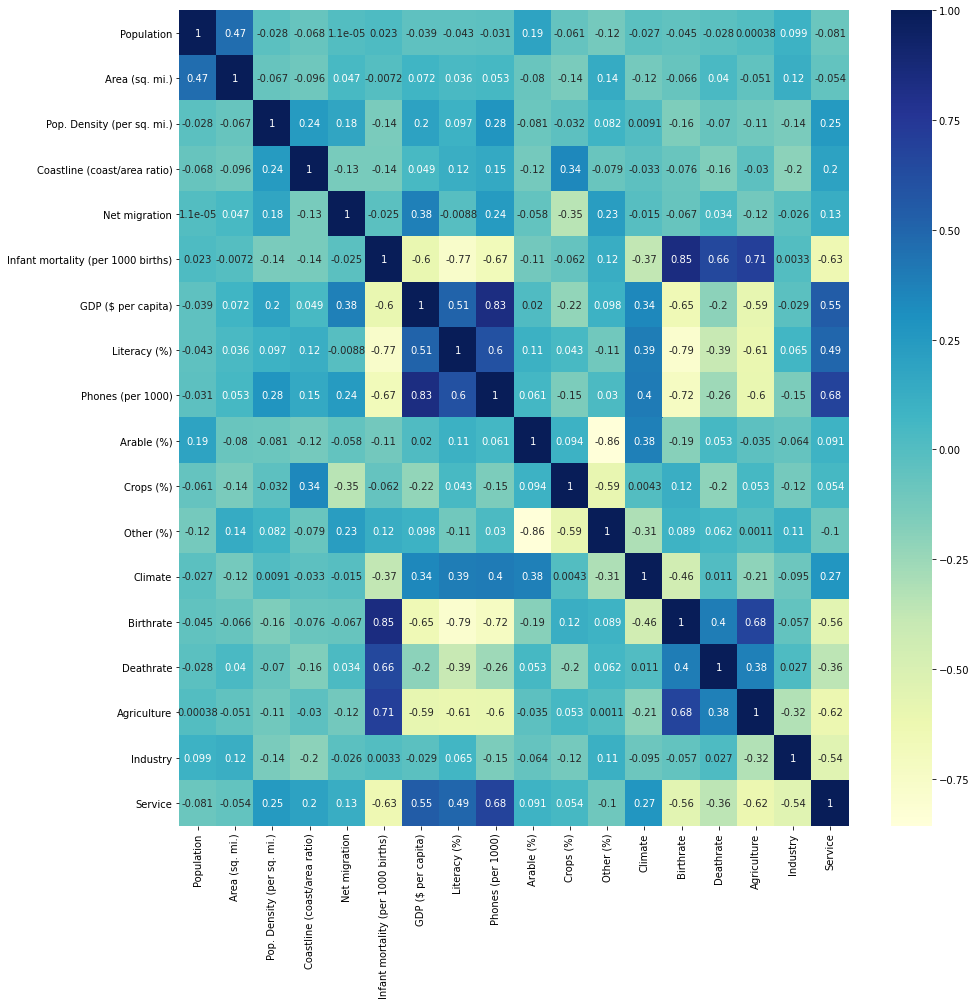

In [181]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True);

In [182]:
len(raw_data["Region"].unique())

11

In [186]:
features = ["Population", "Area (sq. mi.)", "Pop. Density (per sq. mi.)", "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"]
prediction_feature = ["Region"]




[ 0  3  6  4  4  4  2  4  8 10  2  4  5  0  4  2 10  4  9  7  0  4  9  4
  4  0  3  9  0  9  0  9  9  4  9  9  4  0  4  9  9  9  4  9  4  3 10  9
  4  4  4  6  4  9  9  1  9  8 10 10  4  8  9  9  2 10  9 10  4  4  4  9
  9  4  4  4  0  3 10  0  0  0  5 10  5  4  0  5  2  9  0  0  5  2  0  1
  9  9 10  0  9  9  0  0  9  8  4  9  9  4  8  0  9  9 10  4  8  8  4  9
  9 10  5  0  8  4  8  4  4  0  3 10  4  5  9  3  9  4  4  4  8  9  5  9
  9  9  0  9  9 10  0  9  4  9 10 10  5  0  2  0  9  8  4  6  5  2  9  2
  5 10  7  4  2  8  4  0  5  9  9]


In [216]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(raw_data["Region"].values)
dummy_y = to_categorical(Y_train)

print(dummy_y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [234]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense

model = Sequential()
raw_data.dropna(subset=features, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(raw_data[features], dummy_y, test_size=0.3, random_state=48)

print(y_train)

model.add(Dense(17, activation="relu"))

model.add(Dense(12, activation="tanh"))
model.add(Dense(13, activation="relu"))

model.add(Dense(11, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hm = model.fit(X_train, y_train, epochs= 150, validation_data=(X_test, y_test))


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Epoch 1/150

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4/4 [==============================] - 0s 42ms/step - loss: 2.6393 - accuracy: 0.0160 - val_loss: 2.6532 - val_accuracy: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 2.5647 - accuracy: 0.0160 - val_loss: 2.6007 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - 